In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
water = pd.read_csv('drinking_water_potability.csv')
water.head()
water = water.dropna()
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## EDA

<AxesSubplot:xlabel='Potability', ylabel='Count'>

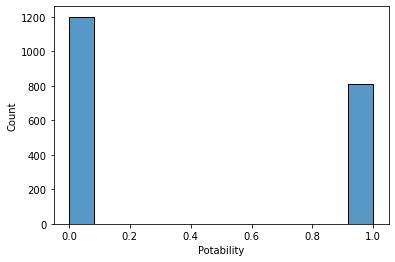

In [3]:
sns.histplot(x ="Potability", data = water)

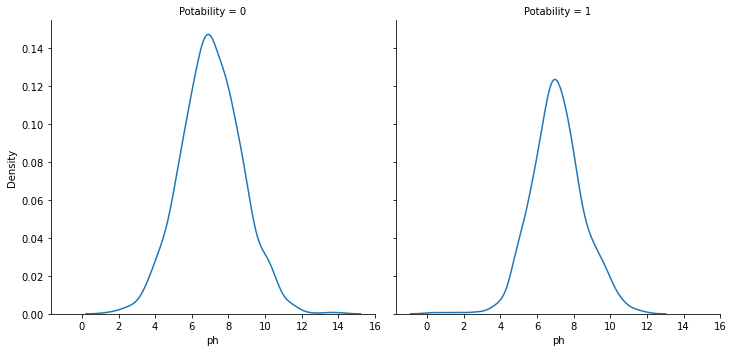

In [4]:
dens = sns.displot(data = water, x = "ph",kind = 'kde', col = 'Potability',col_wrap =3)
dens.figure.set_figwidth(15)

<AxesSubplot:xlabel='ph', ylabel='Count'>

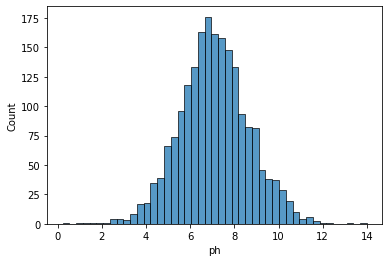

In [5]:
sns.histplot(x ="ph", data = water)

<AxesSubplot:xlabel='Potability', ylabel='ph'>

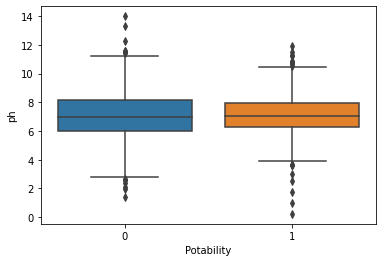

In [6]:
sns.boxplot(x = "Potability", y="ph", data = water)

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

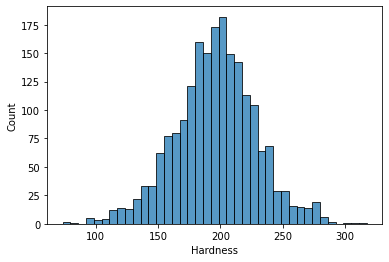

In [7]:
sns.histplot(x = "Hardness", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

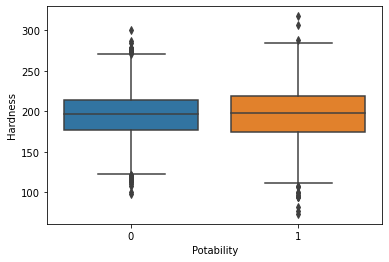

In [8]:
sns.boxplot(x = "Potability", y="Hardness", data = water)

<AxesSubplot:xlabel='Solids', ylabel='Count'>

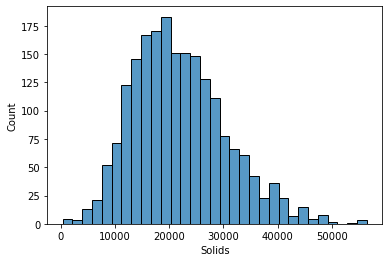

In [9]:
sns.histplot(x = "Solids", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

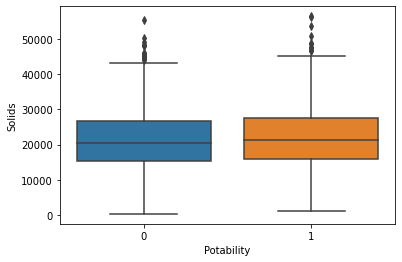

In [10]:
sns.boxplot(x = "Potability", y="Solids", data = water)

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

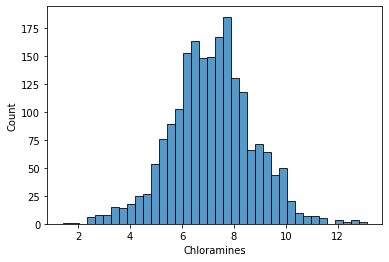

In [11]:
sns.histplot(x = "Chloramines", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

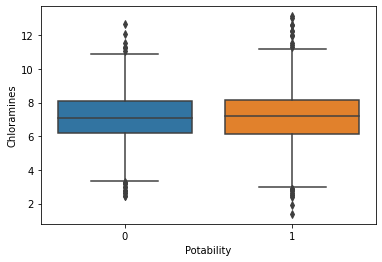

In [12]:
sns.boxplot(x = "Potability", y="Chloramines", data = water)

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

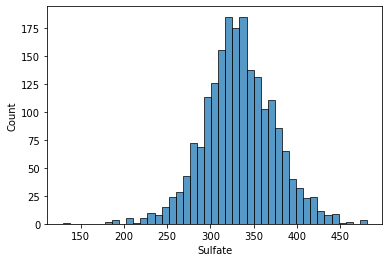

In [13]:
sns.histplot(x = "Sulfate", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

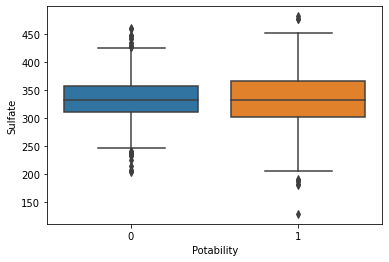

In [14]:
sns.boxplot(x = "Potability", y="Sulfate", data = water)

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

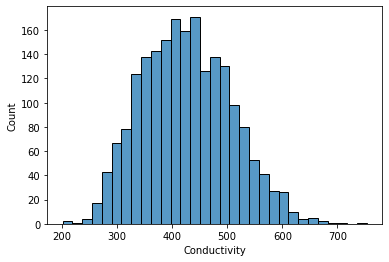

In [15]:
sns.histplot(x = "Conductivity", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

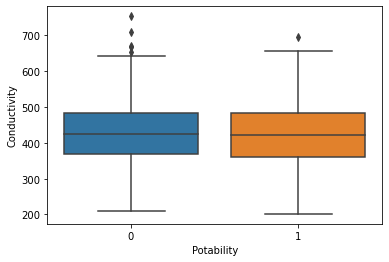

In [16]:
sns.boxplot(x = "Potability", y="Conductivity", data = water)

<AxesSubplot:xlabel='Organic_carbon', ylabel='Count'>

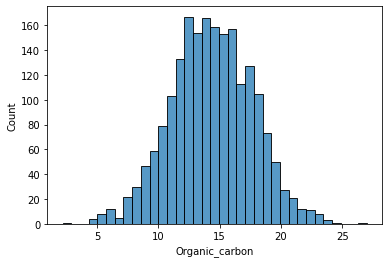

In [17]:
sns.histplot(x = "Organic_carbon", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

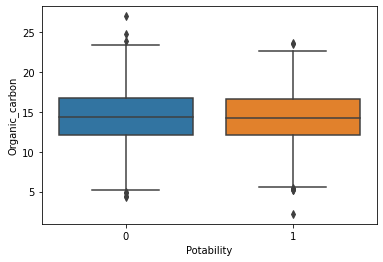

In [18]:
sns.boxplot(x = "Potability", y="Organic_carbon", data = water)

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

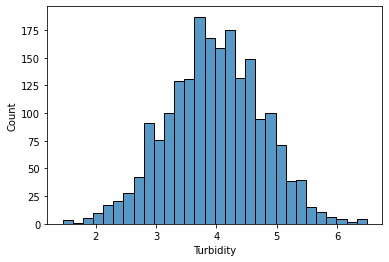

In [19]:
sns.histplot(x = "Turbidity", data = water)

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

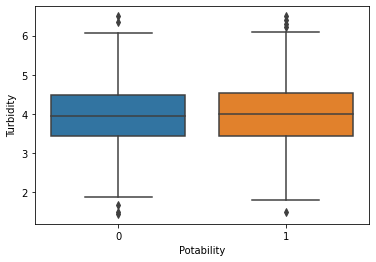

In [20]:
sns.boxplot(x = "Potability", y="Turbidity", data = water)

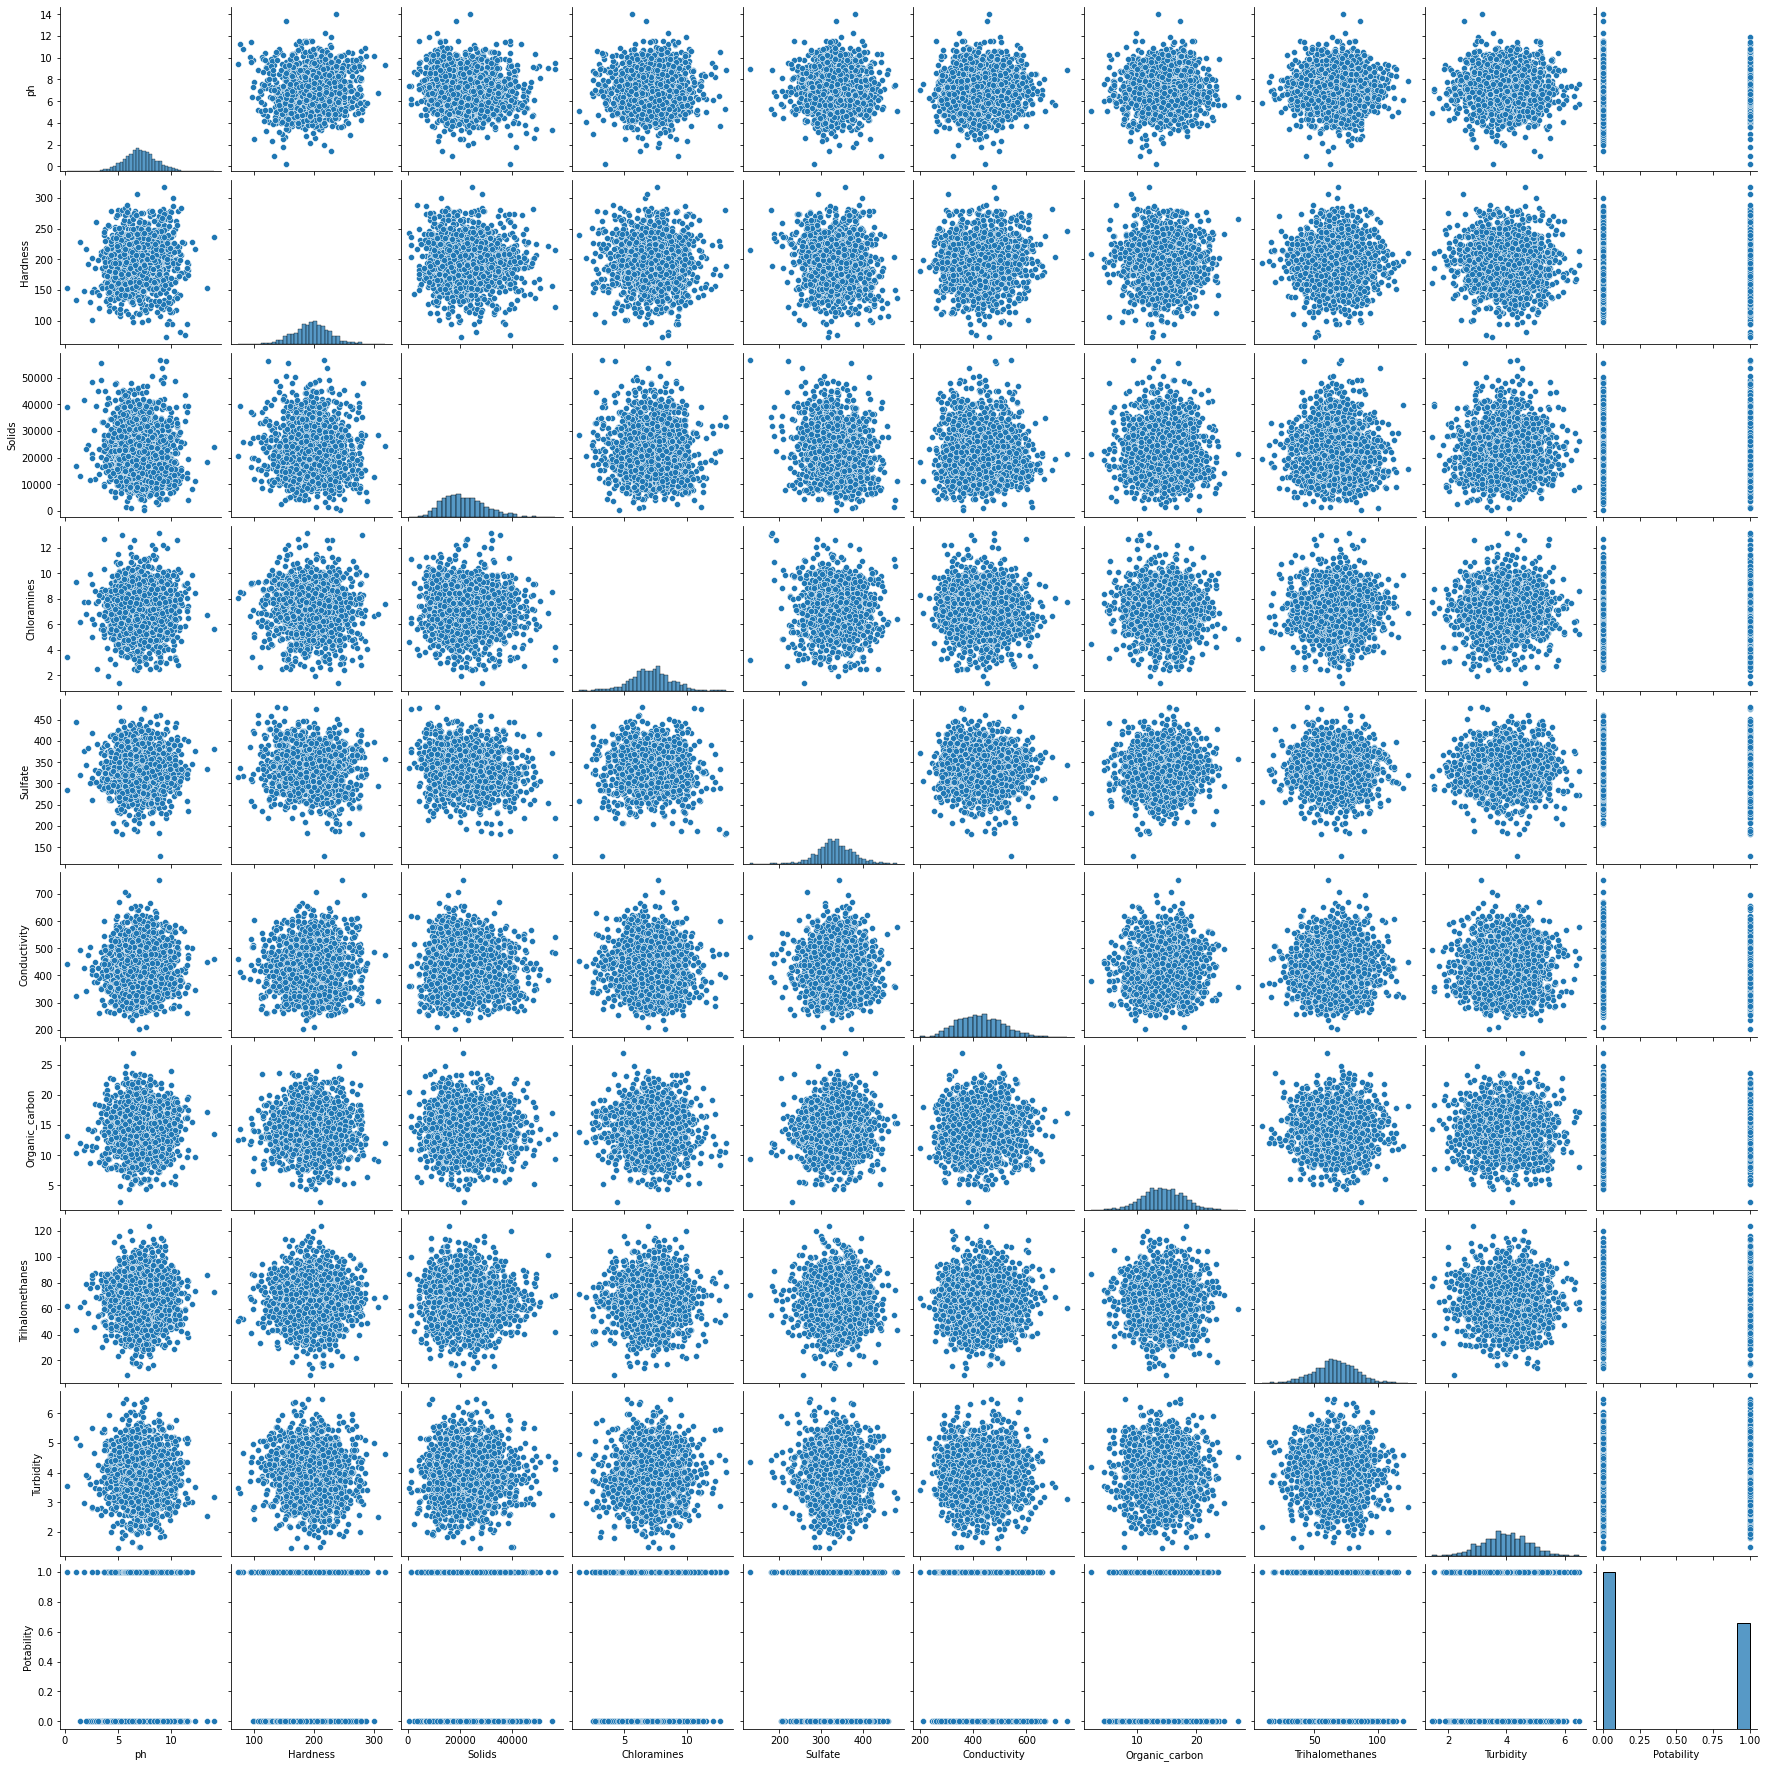

In [21]:
sns.pairplot(water)

<AxesSubplot:>

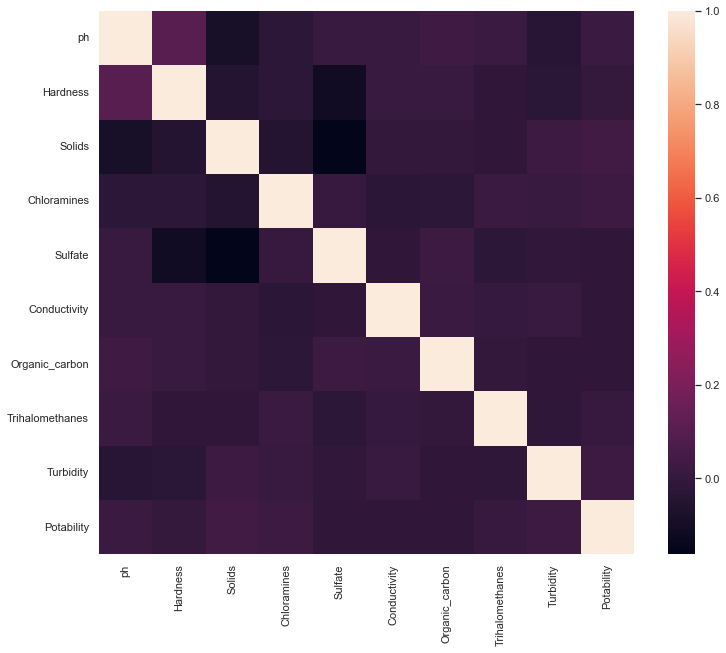

In [22]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(water.corr())

In [3]:
np.random.seed(2)
# 80% to be training
train = water.sample(round(water.shape[0]*.8))
# drop the train data from the test df
test = water.drop(train.index)

In [4]:
def confusion_matrix_test(data,actual_values,model,cutoff=0.48):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    return cm

def accuracytest(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    #sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    #plt.ylabel("Actual Values")
    #plt.xlabel("Predicted Values")
    #print("Classification accuracy = {:.1%}".format(accuracy))
    return accuracy

Optimization terminated successfully.
         Current function value: 0.671184
         Iterations 4
Classification accuracy = 60.4%


array([1191.,    9.])

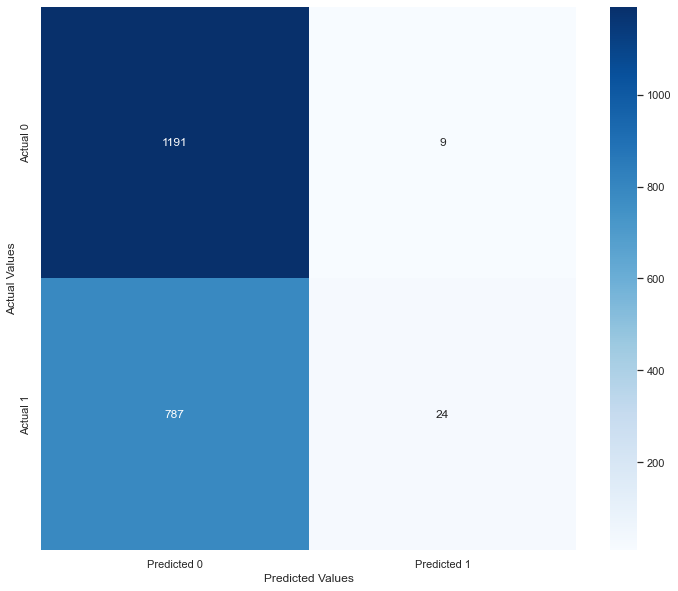

In [25]:
logit_model = sm.logit(formula = 'Potability~Hardness*Solids+Chloramines*Sulfate+\
                Organic_carbon*Sulfate+Conductivity*Hardness+Chloramines*Organic_carbon', data = water).fit() #Developing logistic regression model
logit_model.summary()
accuracy,cm = confusion_matrix_test(water,water.Potability,logit_model,.5)
accuracy

In [26]:
#Function to select the best model amongst all models with 'k' predictors
#BEST SUBSET
''''def getBest_model(k):
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]
    return best_model

In [5]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    accuracy = models_best.apply(lambda row: accuracytest(test,test.Potability,row[1],cutoff=0.5), axis=1)
    plt.plot(models_best["Accuracy"])
    plt.plot(1+accuracy.argmax(), accuracy.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('Accuracy')
    
    plt.figure()
    aic = models_best.apply(lambda row: row[1].aic, axis=1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    plt.figure()
    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [6]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('Potability~' + '+'.join(predictor_subset),data = train).fit()
    accuracy = accuracytest(test,test.Potability,model,cutoff=0.5)
    return {"model":model, "Accuracy":accuracy}

In [29]:
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
773,6.848330,195.451482,15908.64209,6.241349,319.264722,404.204859,18.937338,75.392795,3.732202,1
1200,8.016279,211.029304,14034.48580,9.797000,389.338796,491.079082,14.512991,35.565966,4.308223,1
1086,7.845880,193.785000,13769.86024,9.007161,343.620823,510.305603,13.767802,99.175595,3.667154,1
3057,7.985406,200.134697,17583.08033,6.771729,296.569823,377.584203,10.289288,66.890747,4.752452,0
2965,9.459931,222.894659,14450.17575,6.790914,293.746321,433.145005,9.069161,67.906813,3.322890,0


In [7]:
#RUN ONCE otherwise X will expand like crazy
from sklearn.metrics import r2_score
import itertools
X = train.loc[:, train.columns!='Potability']
train2 = train.copy()
test2 = test.copy()
#Creating a dataframe with all the predictors
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train.loc[:, train.columns!='Potability']
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]

/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a c

/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]
/var/folders/rx/6t25_k4d15j9qj7gtlvqdlqc0000gr/T/ipykernel_54177/2046910641.py:15: SettingWithCopyWarning: 
A value is trying to be set on a c

In [31]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
'''models_best = pd.DataFrame(columns=["Accuracy", "model"])

for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)
models_best'''

'models_best = pd.DataFrame(columns=["Accuracy", "model"])\n\nfor i in range(1,1+X.shape[1]):\n    models_best.loc[i] = getBest_model(i)\nmodels_best'

Optimization terminated successfully.
         Current function value: 0.676568
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676692
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675115
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676696
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676274
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676614
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676644
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676702
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676556
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.676697
  

Optimization terminated successfully.
         Current function value: 0.674519
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674065
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674663
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674740
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674617
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674604
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672516
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673332
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674145
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674596
  

Optimization terminated successfully.
         Current function value: 0.665951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665842
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664509
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664157
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665591
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665948
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665964
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665566
  

Optimization terminated successfully.
         Current function value: 0.650681
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664576
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662991
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663009
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655345
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664693
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664695
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664350
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663432
  

Optimization terminated successfully.
         Current function value: 0.664575
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663993
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663667
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664613
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663949
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647649
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664143
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663516
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657805
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663246
  

Optimization terminated successfully.
         Current function value: 0.658769
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660067
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657722
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.660428
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654096
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657837
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655205
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635463
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.657087
  

Optimization terminated successfully.
         Current function value: 0.650390
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650155
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655136
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653582
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.655545
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640503
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.654840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657731
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652459
  

Optimization terminated successfully.
         Current function value: 0.635908
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635188
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633490
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636021
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635482
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.636126
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634861
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629461
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635185
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635120
  

Optimization terminated successfully.
         Current function value: 0.633035
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635084
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635401
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634785
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629414
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634645
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.635010
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633654
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633124
  

Optimization terminated successfully.
         Current function value: 0.633477
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.632865
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634925
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634941
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628829
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629703
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629137
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.633575
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634931
  

Optimization terminated successfully.
         Current function value: 0.631017
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622534
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631662
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631553
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625962
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623434
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.631452
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.632736
  

Optimization terminated successfully.
         Current function value: 0.620917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621057
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619304
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616688
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616759
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621085
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621097
  

Optimization terminated successfully.
         Current function value: 0.605212
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.614295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613392
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613010
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612463
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615073
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605196
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602617
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605211
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605211
  

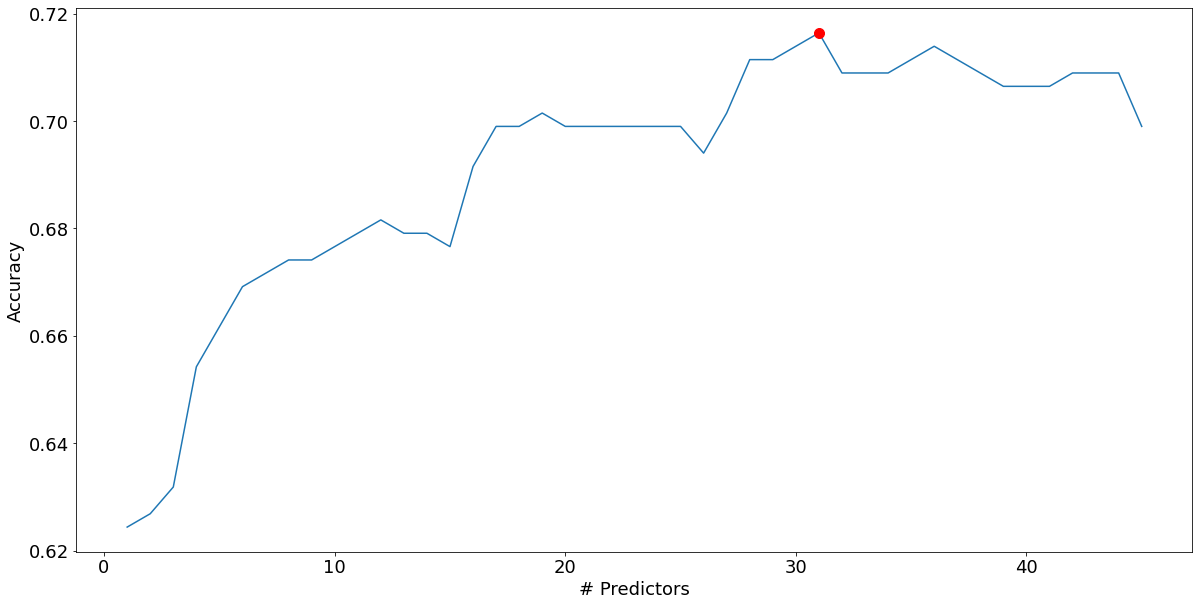

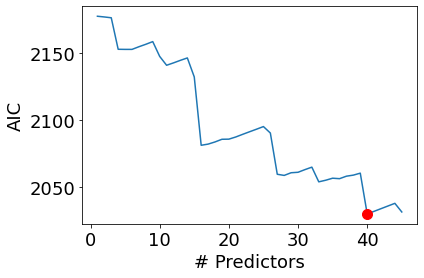

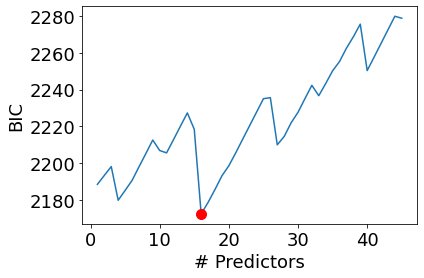

In [8]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]

    # Return the best model, along with some other useful information about the model
    return best_model

def forward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"])

    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])
    return models_best

models_best = forward_selection()
best_sub_plots()


In [15]:
models_best.Accuracy.sort_values(ascending=False)

31    0.716418
30     0.71393
36     0.71393
35    0.711443
28    0.711443
29    0.711443
37    0.711443
38    0.708955
34    0.708955
33    0.708955
32    0.708955
42    0.708955
43    0.708955
44    0.708955
39    0.706468
40    0.706468
41    0.706468
27    0.701493
19    0.701493
23    0.699005
24    0.699005
25    0.699005
45    0.699005
22    0.699005
21    0.699005
20    0.699005
18    0.699005
17    0.699005
26     0.69403
16    0.691542
12    0.681592
11    0.679104
13    0.679104
14    0.679104
15    0.676617
10    0.676617
9     0.674129
8     0.674129
7     0.671642
6     0.669154
5     0.661692
4     0.654229
3     0.631841
2     0.626866
1     0.624378
Name: Accuracy, dtype: object

In [22]:
models_best.apply(lambda row: row[1].aic, axis=1).idxmin()

40

In [23]:
models_best.apply(lambda row: row[1].bic, axis=1).idxmin()

16

In [16]:
models_best.loc[40,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Potability   No. Observations:                 1609
Model:                          Logit   Df Residuals:                     1568
Method:                           MLE   Df Model:                           40
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                  0.1056
Time:                        22:30:08   Log-Likelihood:                -973.79
converged:                       True   LL-Null:                       -1088.8
Covariance Type:            nonrobust   LLR p-value:                 1.555e-28
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -16.8938      7.498     -2.253      0.024     -31.589      -2.198
Solids_Conductivity             5.645e-08   8.39e-08      0.673      0.501   -1.08e-07    2.21e-07
ph_Chloramines                     0.1676      0.026      6.367      0.000       0.116       0.219
Chloramines                       -0.6274      0.533     -1.176      0.239      -1.673       0.418
ph_Sulfate                        -0.0090      0.001     -8.129      0.000      -0.011      -0.007
ph_Organic_carbon                  0.0070      0.012      0.589      0.556      -0.016       0.030
Sulfate_Trihalomethanes        -9.044e-05   7.47e-05     -1.210      0.226      -0.000     5.6e-05
ph_Turbidity                       0.0322      0.051      0.633      0.527      -0.068       0.132
Hardness_Turbidity                 0.0019      0.002      0.831      0.406      -0.003       0.006
Hardness_Organic_carbon           -0.0006      0.001     -1.043      0.297      -0.002       0.001
Hardness_Chloramines              -0.0019      0.001     -1.707      0.088      -0.004       0.000
ph_Solids                       1.762e-05    4.4e-06      4.006      0.000       9e-06    2.62e-05
Conductivity_Trihalomethanes    7.656e-05   4.16e-05      1.841      0.066   -4.93e-06       0.000
Hardness                           0.0112      0.025      0.452      0.651      -0.037       0.060
Chloramines_Organic_carbon        -0.0106      0.011     -0.938      0.348      -0.033       0.012
Hardness_Solids                -4.489e-07   2.17e-07     -2.068      0.039   -8.74e-07   -2.34e-08
Chloramines_Sulfate               -0.0005      0.001     -0.607      0.544      -0.002       0.001
Chloramines_Trihalomethanes        0.0005      0.002      0.226      0.821      -0.004       0.005
Conductivity                      -0.0166      0.009     -1.925      0.054      -0.033       0.000
Solids_Trihalomethanes          3.894e-07    4.3e-07      0.906      0.365   -4.53e-07    1.23e-06
Solids                             0.0003      0.000      2.502      0.012    5.75e-05       0.000
Turbidity                         -0.8034      0.831     -0.967      0.334      -2.432       0.825
Solids_Turbidity                 1.22e-06   8.75e-06      0.139      0.889   -1.59e-05    1.84e-05
Solids_Organic_carbon          -5.575e-07   2.04e-06     -0.273      0.785   -4.56e-06    3.44e-06
Chloramines_Conductivity           0.0001      0.000      0.289      0.773      -0.001       0.001
Chloramines_Turbidity              0.0131      0.047      0.277      0.782      -0.080       0.106
Solids_Sulfate                 -1.021e-06   1.77e-07     -5.772      0.000   -1.37e-06   -6.74e-07
Hardness_Sulfate                4.275e-05   4.08e-05      1.049      0.294   -3.72e-05       0.000
Hardness_Conductivity           3.218e-05   2.16e-05      1.489      0.137   -1.02e-05    7.46e-05
ph                                 1.7407      0.622      2.800      0.00

In [24]:
models_best.loc[16,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Potability   No. Observations:                 1609
Model:                          Logit   Df Residuals:                     1592
Method:                           MLE   Df Model:                           16
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                 0.05996
Time:                        22:31:52   Log-Likelihood:                -1023.5
converged:                       True   LL-Null:                       -1088.8
Covariance Type:            nonrobust   LLR p-value:                 4.984e-20
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.2372      1.742      1.859      0.063      -0.176       6.651
Solids_Conductivity          -1.029e-08   5.22e-08     -0.197      0.844   -1.13e-07     9.2e-08
ph_Chloramines                   0.1524      0.022      7.061      0.000       0.110       0.195
Chloramines                     -1.7925      0.342     -5.246      0.000      -2.462      -1.123
ph_Sulfate                      -0.0043      0.001     -7.801      0.000      -0.005      -0.003
ph_Organic_carbon                0.0033      0.009      0.369      0.712      -0.014       0.021
Sulfate_Trihalomethanes       7.179e-06   2.45e-05      0.292      0.770   -4.09e-05    5.53e-05
ph_Turbidity                    -0.0128      0.036     -0.354      0.723      -0.084       0.058
Hardness_Turbidity               0.0007      0.001      0.558      0.577      -0.002       0.003
Hardness_Organic_carbon       -7.15e-05      0.000     -0.193      0.847      -0.001       0.001
Hardness_Chloramines            -0.0025      0.001     -2.477      0.013      -0.005      -0.001
ph_Solids                     1.707e-05   3.43e-06      4.970      0.000    1.03e-05    2.38e-05
Conductivity_Trihalomethanes -2.767e-06   1.78e-05     -0.156      0.876   -3.76e-05    3.21e-05
Hardness                         0.0286      0.011      2.707      0.007       0.008       0.049
Chloramines_Organic_carbon      -0.0025      0.009     -0.277      0.782      -0.020       0.015
Hardness_Solids              -5.237e-07   1.44e-07     -3.636      0.000   -8.06e-07   -2.41e-07
Chloramines_Sulfate              0.0038      0.001      6.805      0.000       0.003       0.005
================================================================================================
"""

In [ ]:
models_best.loc[31,'model'].summary()

Classification accuracy = 71.6%
0.3881578947368421 0.18421052631578946


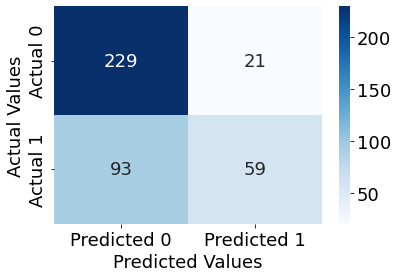

In [28]:
#Best based on accuracy
cm = confusion_matrix_test(test,test.Potability,models_best.loc[31,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[1,0])
print(recall,fpr)

Classification accuracy = 70.6%
0.375 0.19491525423728814


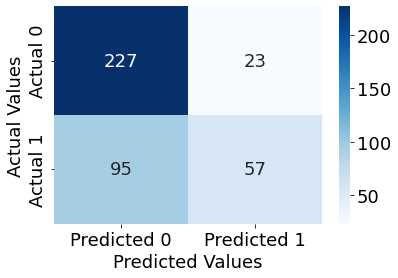

In [29]:
#Best based on AIC
cm = confusion_matrix_test(test,test.Potability,models_best.loc[40,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[1,0])
print(recall,fpr)

Classification accuracy = 69.2%
0.29605263157894735 0.13709677419354838


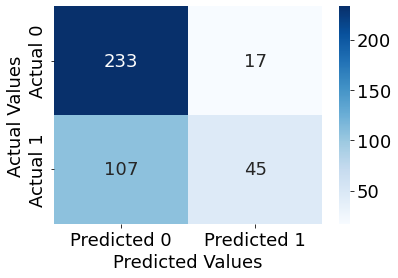

In [30]:
#Best based on BIC
cm = confusion_matrix_test(test,test.Potability,models_best.loc[16,'model'],cutoff=0.5)
recall = cm[1,1]/(cm[1,1]+cm[1,0])
fpr = cm[0,1]/(cm[0,1]+cm[1,0])
print(recall,fpr)

Optimization terminated successfully.
         Current function value: 0.674403
         Iterations 4
Classification accuracy = 62.7%


array([[247.,   3.],
       [147.,   5.]])

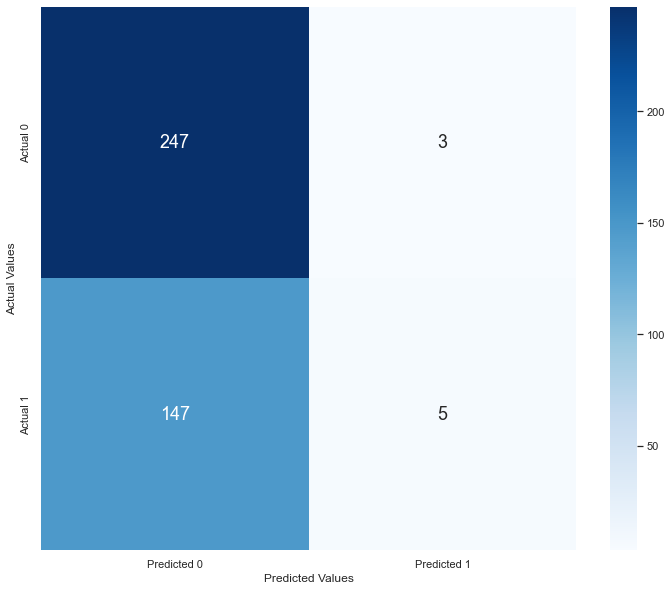

In [37]:
#model with all predictors and all interactions
model_all = sm.logit("Potability~" + "+".join(X_backup.columns), data = train2).fit()
confusion_matrix_test(test, test.Potability, model_all)

Optimization terminated successfully.
         Current function value: 0.671369
         Iterations 5
Classification accuracy = 63.2%
Optimization terminated successfully.
         Current function value: 0.669043
         Iterations 5
Classification accuracy = 60.4%
Optimization terminated successfully.
         Current function value: 0.674215
         Iterations 4
Classification accuracy = 62.4%
Optimization terminated successfully.
         Current function value: 0.669344
         Iterations 4
Classification accuracy = 61.4%
Optimization terminated successfully.
         Current function value: 0.662274
         Iterations 5
Classification accuracy = 64.9%
Optimization terminated successfully.
         Current function value: 0.673812
         Iterations 4
Classification accuracy = 61.9%
Optimization terminated successfully.
         Current function value: 0.674089
         Iterations 4
Classification accuracy = 63.4%
Optimization terminated successfully.
         Current functio

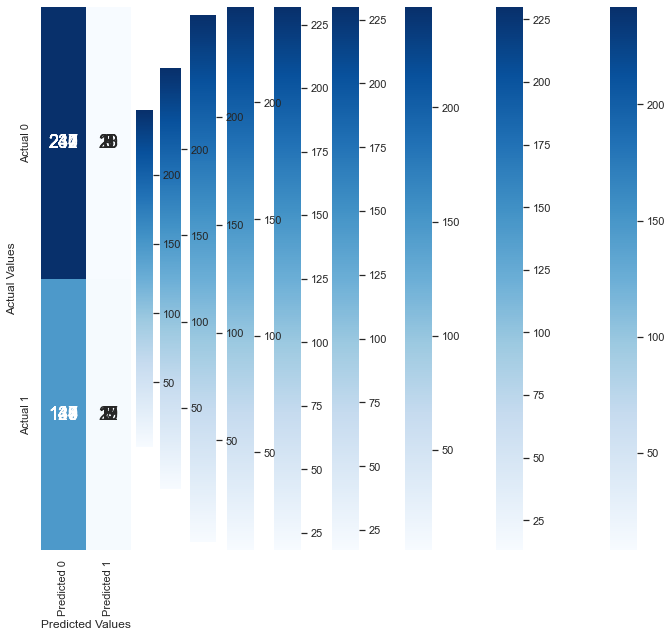

In [38]:
for i in model_all.params.index[1:]:
    model = sm.logit("Potability~" + "+".join(X_backup.columns) + "+I(" + i + "**2)", data = train2).fit()
    confusion_matrix_test(test, test.Potability, model)

In [39]:
best_in_model = models_best.loc[33,'model']
best_in_model.params.index[1:]

Index(['Solids_Conductivity', 'ph_Chloramines', 'Chloramines', 'ph_Sulfate',
       'ph_Organic_carbon', 'Sulfate_Trihalomethanes', 'ph_Turbidity',
       'Hardness_Turbidity', 'Hardness_Organic_carbon', 'Hardness_Chloramines',
       'ph_Solids', 'Conductivity_Trihalomethanes', 'Hardness',
       'Chloramines_Organic_carbon', 'Hardness_Solids', 'Chloramines_Sulfate',
       'Chloramines_Trihalomethanes', 'Conductivity', 'Solids_Trihalomethanes',
       'Solids', 'Turbidity', 'Solids_Turbidity', 'Solids_Organic_carbon',
       'Chloramines_Conductivity', 'Chloramines_Turbidity', 'Solids_Sulfate',
       'Hardness_Sulfate', 'Hardness_Conductivity', 'ph', 'ph_Trihalomethanes',
       'Conductivity_Turbidity', 'Organic_carbon_Trihalomethanes',
       'Sulfate_Organic_carbon'],
      dtype='object')

Optimization terminated successfully.
         Current function value: 0.611119
         Iterations 6
Classification accuracy = 68.7%
Optimization terminated successfully.
         Current function value: 0.613020
         Iterations 6
Classification accuracy = 69.9%
Optimization terminated successfully.
         Current function value: 0.616902
         Iterations 6
Classification accuracy = 69.9%
Optimization terminated successfully.
         Current function value: 0.612802
         Iterations 6
Classification accuracy = 70.1%
Optimization terminated successfully.
         Current function value: 0.593282
         Iterations 6
Classification accuracy = 70.6%
Optimization terminated successfully.
         Current function value: 0.616428
         Iterations 6
Classification accuracy = 69.9%
Optimization terminated successfully.
         Current function value: 0.616035
         Iterations 6
Classification accuracy = 69.7%
Optimization terminated successfully.
         Current functio

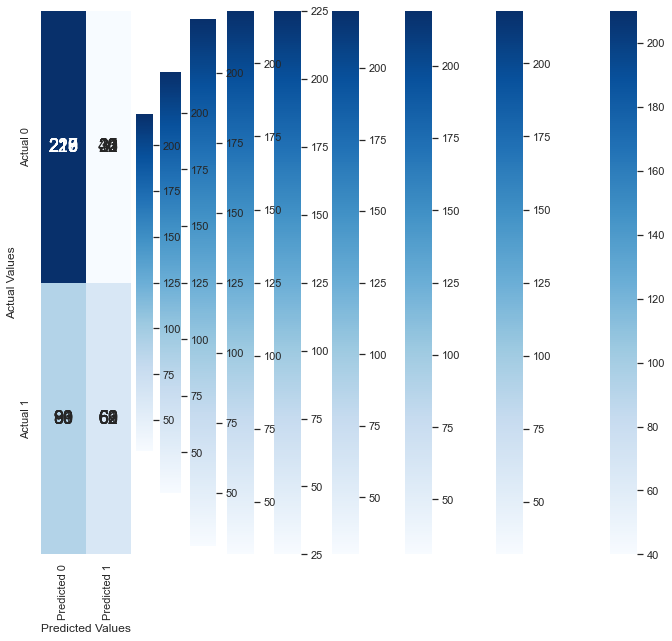

In [40]:
for i in model_all.params.index[1:]:
    model = sm.logit("Potability~" + "+".join(best_in_model.params.index[1:]) + "+I(" + i + "**2)+I(" + i + "**3)", data = train).fit()
    confusion_matrix_test(test, test.Potability, model)

Optimization terminated successfully.
         Current function value: 0.593282
         Iterations 6
Classification accuracy = 70.6%


array([[225.,  25.],
       [ 93.,  59.]])

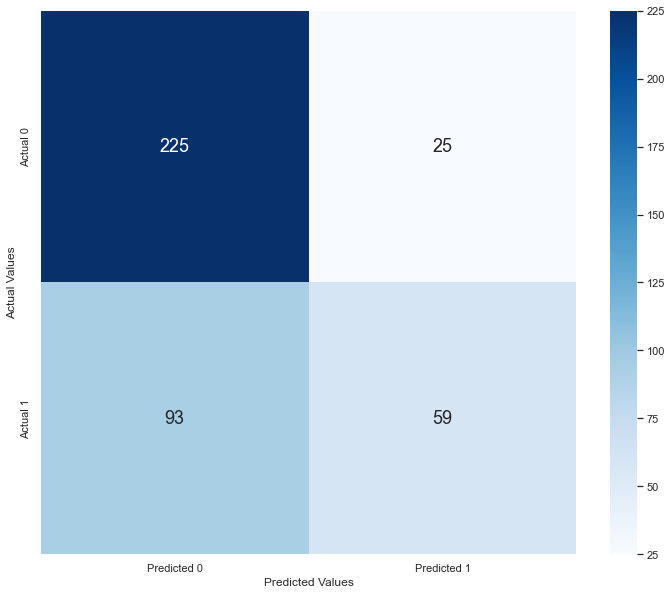

In [41]:
model_best = sm.logit("Potability~" + "+".join(best_in_model.params.index[1:]) + "+I(Sulfate**2)+I(Sulfate**3)", data = train).fit()
confusion_matrix_test(test, test.Potability, model_best)

Optimization terminated successfully.
         Current function value: 0.602561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602562
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602594
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603158
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602566
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603005
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602604
  

Optimization terminated successfully.
         Current function value: 0.602986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602960
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603764
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603252
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605897
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603044
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605893
         Iterations 6
Processed  44 models on 43 predictors in 3.131437063217163 seconds.
Optimization terminated successfully.
         Current function value: 0.602983
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.608466
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603889
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603182
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603006
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.602983
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603774
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608541
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603264
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605928
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603066
  

Optimization terminated successfully.
         Current function value: 0.603942
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603269
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603081
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603831
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609874
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603332
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603139
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.605981
  

Optimization terminated successfully.
         Current function value: 0.612218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606084
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603157
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606071
         Iterations 6
Processed  38 models on 37 predictors in 2.2983601093292236 seconds.
Optimization terminated successfully.
         Current function value: 0.608612
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608644
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609501
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609057
         Iterations 6
Optimization 

Optimization terminated successfully.
         Current function value: 0.609562
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609098
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608993
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608654
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608636
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608861
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608703
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.608754
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619754
  

Optimization terminated successfully.
         Current function value: 0.609816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609813
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609065
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609093
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609064
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609193
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.639735
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610602
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609364
  

Optimization terminated successfully.
         Current function value: 0.616579
         Iterations 6
Processed  31 models on 30 predictors in 1.5547709465026855 seconds.
Optimization terminated successfully.
         Current function value: 0.609494
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610373
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609894
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609763
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609488
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609767
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609528
         Iterations 6
Optimization 

Optimization terminated successfully.
         Current function value: 0.609662
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609584
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609857
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619391
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610176
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.616816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609608
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617086
         Iterations 6
Processed  28 models on 27 predictors in 1.2696168422698975 seconds.
Optimization 

Optimization terminated successfully.
         Current function value: 0.624485
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610372
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.617061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.609783
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.620170
         Iterations 6
Processed  25 models on 24 predictors in 1.038074254989624 seconds.
Optimization terminated successfully.
         Current function value: 0.610656
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610182
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610020
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610085
         Iterations 6
Optimization t

Optimization terminated successfully.
         Current function value: 0.611058
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610611
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610098
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.640642
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621246
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611523
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.610408
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.611321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.634454
  

Optimization terminated successfully.
         Current function value: 0.613014
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.613733
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.651179
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613976
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622285
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622821
         Iterations 6
Processed  17 models on 16 predictors in 0.5006489753723145 seconds.
Optimization terminated successfully.
         Current function value: 0.613432
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.612993
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.623939
         Iterations 6
Optimization 

Optimization terminated successfully.
         Current function value: 0.616227
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.619029
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.656551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.629070
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.629248
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.628701
         Iterations 6
Processed  11 models on 10 predictors in 0.2387528419494629 seconds.
Optimization terminated successfully.
         Current function value: 0.628797
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.647828
         Iterations 5
Optimization 

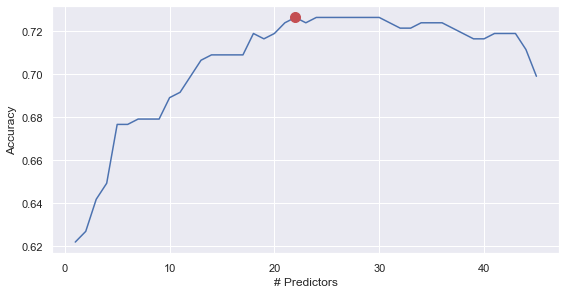

In [42]:
#backward
import time
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model
def backward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

models_best = backward_selection()
best_sub_plots()

In [43]:
models_best.Accuracy.sort_values(ascending=False)

30    0.726368
29    0.726368
28    0.726368
27    0.726368
26    0.726368
25    0.726368
24    0.726368
22    0.726368
23    0.723881
31    0.723881
36    0.723881
35    0.723881
34    0.723881
21    0.723881
33    0.721393
32    0.721393
37    0.721393
18    0.718905
20    0.718905
38    0.718905
41    0.718905
42    0.718905
43    0.718905
19    0.716418
39    0.716418
40    0.716418
44    0.711443
16    0.708955
15    0.708955
14    0.708955
17    0.708955
13    0.706468
45    0.699005
12    0.699005
11    0.691542
10    0.689055
9     0.679104
8     0.679104
7     0.679104
6     0.676617
5     0.676617
4     0.649254
3     0.641791
2     0.626866
1     0.621891
Name: Accuracy, dtype: object

In [44]:
models_best.loc[22,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Potability   No. Observations:                 1609
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           22
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                 0.09884
Time:                        18:01:57   Log-Likelihood:                -981.19
converged:                       True   LL-Null:                       -1088.8
Covariance Type:            nonrobust   LLR p-value:                 1.153e-33
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -23.9065      3.939     -6.069      0.000     -31.627     -16.186
ph                               2.8165      0.500      5.630      0.000       1.836       3.797
Solids                           0.0004   9.38e-05      4.766      0.000       0.000       0.001
Chloramines                     -0.4270      0.281     -1.521      0.128      -0.977       0.123
Sulfate                          0.0842      0.010      8.115      0.000       0.064       0.105
Conductivity                    -0.0138      0.006     -2.143      0.032      -0.027      -0.001
Organic_carbon                  -0.0950      0.098     -0.974      0.330      -0.286       0.096
ph_Hardness                     -0.0022      0.001     -2.258      0.024      -0.004      -0.000
ph_Chloramines                   0.1448      0.025      5.714      0.000       0.095       0.195
ph_Sulfate                      -0.0096      0.001     -8.918      0.000      -0.012      -0.008
ph_Conductivity                 -0.0004      0.001     -0.844      0.399      -0.001       0.001
Hardness_Solids               -2.95e-07   1.93e-07     -1.529      0.126   -6.73e-07    8.32e-08
Hardness_Chloramines            -0.0016      0.001     -1.579      0.114      -0.004       0.000
Hardness_Sulfate              5.571e-05   2.88e-05      1.932      0.053   -8.09e-07       0.000
Hardness_Conductivity         3.777e-05   1.92e-05      1.970      0.049    1.84e-07    7.54e-05
Solids_Chloramines           -1.209e-05   4.48e-06     -2.700      0.007   -2.09e-05   -3.31e-06
Solids_Sulfate               -9.902e-07   1.73e-07     -5.730      0.000   -1.33e-06   -6.51e-07
Solids_Conductivity           4.434e-08   8.16e-08      0.543      0.587   -1.16e-07    2.04e-07
Solids_Organic_carbon        -9.351e-07   1.92e-06     -0.486      0.627    -4.7e-06    2.83e-06
Solids_Trihalomethanes        4.074e-07   3.98e-07      1.023      0.306   -3.73e-07    1.19e-06
Sulfate_Trihalomethanes         -0.0001   5.22e-05     -2.158      0.031      -0.000   -1.03e-05
Conductivity_Organic_carbon      0.0002      0.000      1.199      0.230      -0.000       0.001
Conductivity_Trihalomethanes  6.752e-05   3.84e-05      1.759      0.079   -7.72e-06       0.000
================================================================================================
"""

Classification accuracy = 72.6%


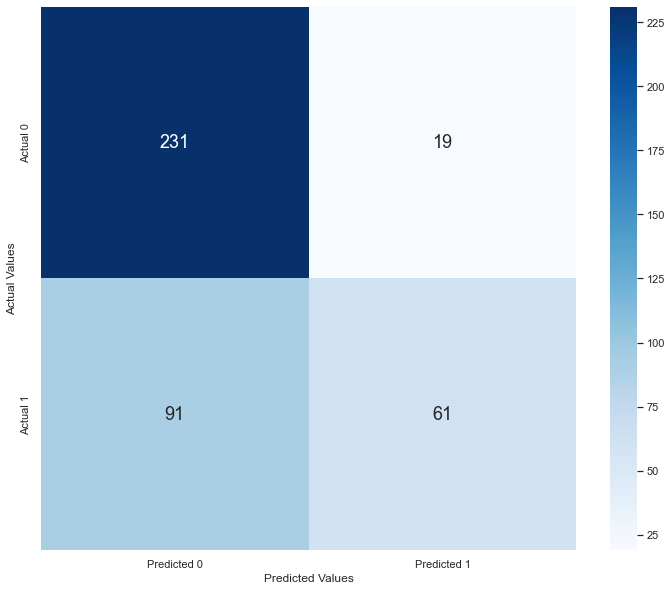

In [45]:
cm = confusion_matrix_test(test,test.Potability,models_best.loc[22,'model'],cutoff=0.5)

Optimization terminated successfully.
         Current function value: 0.602492
         Iterations 6
Classification accuracy = 69.9%
Optimization terminated successfully.
         Current function value: 0.605929
         Iterations 6
Classification accuracy = 71.1%
Optimization terminated successfully.
         Current function value: 0.609496
         Iterations 6
Classification accuracy = 70.9%
Optimization terminated successfully.
         Current function value: 0.606043
         Iterations 6
Classification accuracy = 72.4%
Optimization terminated successfully.
         Current function value: 0.595655
         Iterations 7
Classification accuracy = 71.1%
Optimization terminated successfully.
         Current function value: 0.609315
         Iterations 6
Classification accuracy = 71.6%
Optimization terminated successfully.
         Current function value: 0.608428
         Iterations 6
Classification accuracy = 71.1%
Optimization terminated successfully.
         Current functio

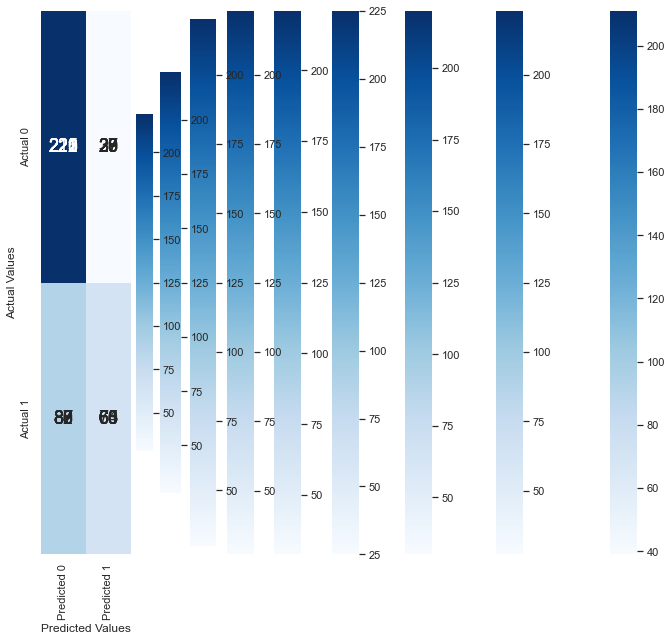

In [46]:
best_in_model = models_best.loc[22,'model']
for i in X_backup.columns:
    model = sm.logit("Potability~" + "+".join(best_in_model.params.index[1:]) + "+I(" + i + "**2)+I(" + i + "**3)", data = train).fit()
    confusion_matrix_test(test, test.Potability, model)